# BUSA 523 Assignment 4 -- Stephen Harwell

a. Histogram

b. Barchart

c. Linechart

d. Areachart

e. Scatterplot

In [1]:
import pandas as pd
from matplotlib import pyplot as plt, ticker
plt.style.use('seaborn')

df = pd.read_csv('data.csv', index_col='Date', parse_dates=['Date'])


## Initial Data Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-05-02 to 2012-10-26
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   143 non-null    float64
 1   Fuel_Price    143 non-null    float64
 2   MarkDown1     51 non-null     float64
 3   MarkDown2     42 non-null     float64
 4   MarkDown3     50 non-null     float64
 5   MarkDown4     51 non-null     float64
 6   MarkDown5     51 non-null     float64
 7   CPI           143 non-null    float64
 8   Unemployment  143 non-null    float64
 9   Day type      143 non-null    object 
 10  dept_1 sales  143 non-null    float64
 11  dept_2 sales  143 non-null    float64
 12  dept_3 sales  143 non-null    float64
dtypes: float64(12), object(1)
memory usage: 15.6+ KB


In [3]:
df.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,dept_1 sales,dept_2 sales,dept_3 sales
count,143.000000,143.000000,51.000000,42.000000,50.000000,51.000000,51.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,68.306783,3.219699,8090.766275,2941.315476,1225.400400,3746.084706,5018.654902,215.996892,7.610420,22513.322937,46102.090420,13150.478042
std,14.250486,0.427313,6606.895728,7955.538483,7879.963965,5999.640785,3281.844937,4.350890,0.383749,9854.349032,3440.673222,8708.978853
min,35.400000,2.514000,410.310000,0.500000,0.250000,8.000000,554.920000,210.337426,6.573000,14537.370000,35819.830000,6165.730000
25%,58.265000,2.764500,4089.630000,41.660000,6.212500,589.750000,3178.035000,211.549277,7.348000,16494.630000,44170.460000,8693.040000
50%,69.640000,3.290000,6154.140000,144.870000,25.965000,1822.550000,4325.190000,215.459905,7.787000,18535.480000,45561.850000,10366.850000
75%,80.485000,3.594000,9997.650000,1447.435000,95.725000,3695.005000,6185.645000,220.531330,7.838000,23214.215000,47612.245000,12655.610000
max,91.650000,3.907000,34577.060000,46011.380000,55805.510000,32403.870000,20475.320000,223.444251,8.106000,57592.120000,65615.360000,51159.170000


In [4]:
df.sample(10)

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day type,dept_1 sales,dept_2 sales,dept_3 sales
Date,,,,,,,,,,,,,
2012-06-15,79.35,3.393,5621.99,109.60,0.25,2420.28,3083.26,221.762642,7.143,Regular day,17558.82,46637.48,8016.26
2010-04-16,66.32,2.808,NaN,NaN,NaN,NaN,NaN,210.488700,7.808,Regular day,17596.96,45025.02,9226.80
2011-12-08,90.76,3.638,NaN,NaN,NaN,NaN,NaN,215.605788,7.962,Regular day,14539.79,45341.92,32148.93
2012-09-21,69.87,3.721,6352.30,7.64,4.69,1010.06,6456.71,222.781839,6.908,Regular day,19251.50,43541.07,13403.63
2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,Regular day,41595.55,47928.89,11523.47
2012-02-17,45.32,3.510,9873.33,11062.27,9.80,8409.31,3402.66,220.425759,7.348,Regular day,54060.10,46085.47,10237.78
2012-06-04,70.43,3.891,10121.97,NaN,77.98,3750.59,4510.72,221.435611,7.143,Regular day,57592.12,51805.88,9335.24
2011-03-06,83.00,3.699,NaN,NaN,NaN,NaN,NaN,215.273655,7.682,Regular day,16434.15,47844.27,8853.89
2012-09-14,74.97,3.717,17212.52,7.00,18.79,1523.11,7992.72,222.582019,6.908,Regular day,19616.22,44493.61,14288.22


### Checking out the only categorical column.

In [5]:
df['Day type'].value_counts()

Regular day    133
Holiday         10
Name: Day type, dtype: int64

### Checking out the date index

In [6]:
df.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [7]:
print('min: ', df.index.min())
print('max: ', df.index.max()) # The dates are not in order

min:  2010-01-10 00:00:00
max:  2012-12-10 00:00:00


## Histogram

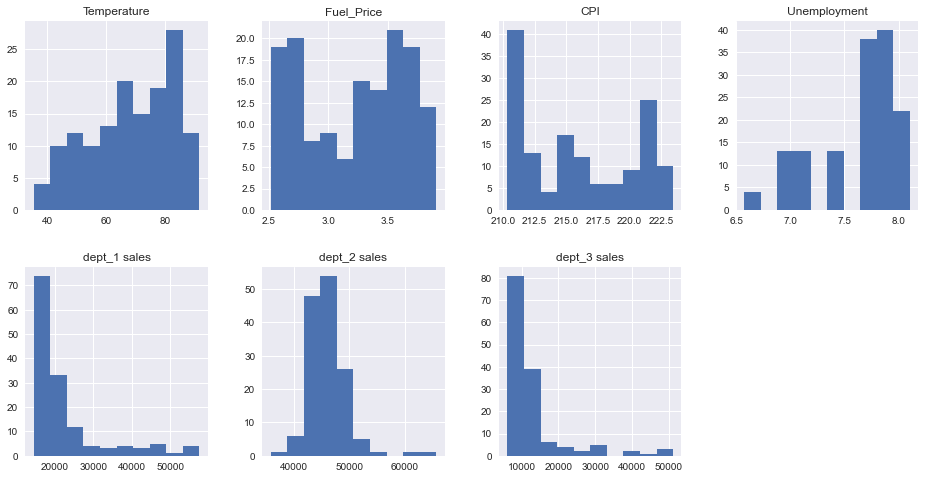

In [8]:
# Using df.hist here becaue it automatically creates separate graphs.
_ = df.hist(
    figsize=(16,8),
    layout=(2,4),
    column=[
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'dept_1 sales',
    'dept_2 sales',
    'dept_3 sales',
    ]
)

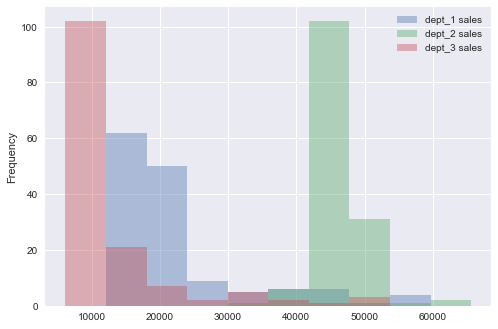

In [9]:
_ = df[['dept_1 sales', 'dept_2 sales', 'dept_3 sales']].plot.hist(alpha=0.4)

## Bar chart

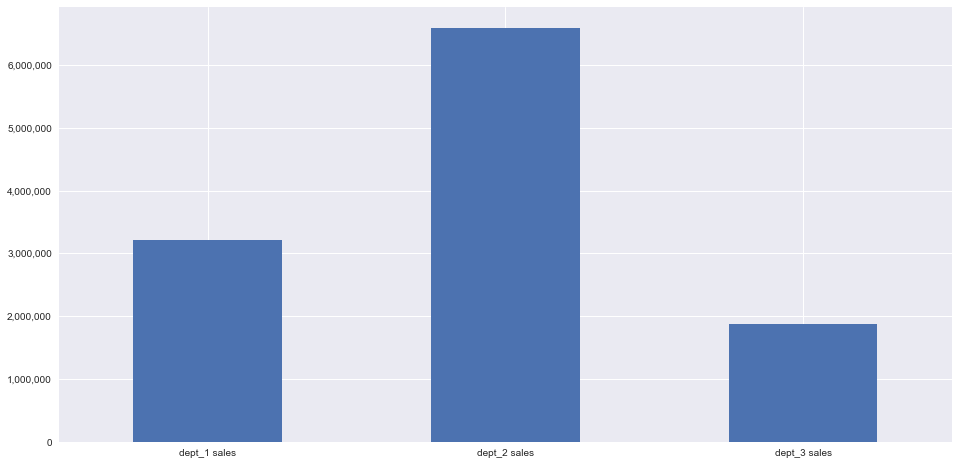

In [18]:
ax = df[['dept_1 sales', 'dept_2 sales', 'dept_3 sales']].sum().plot.bar(figsize=(16, 8), rot=0)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # Prevent scientific notation

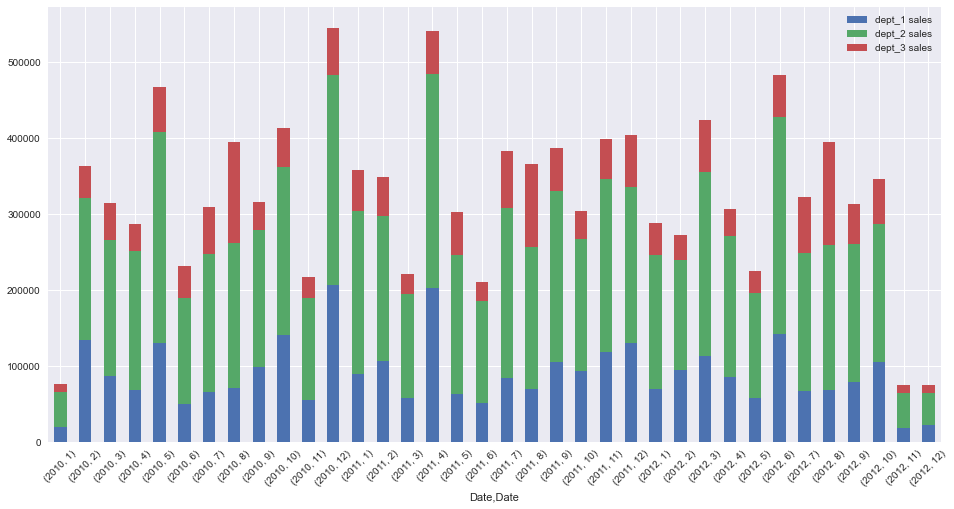

In [11]:
ax_1 = df[['dept_1 sales', 'dept_2 sales', 'dept_3 sales']].groupby(by=[df.index.year, df.index.month]).sum().plot.bar(figsize=(16, 8), rot=45, stacked=True)

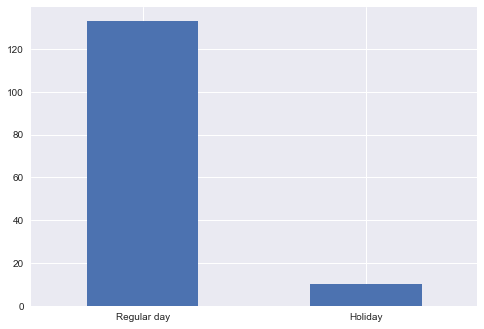

In [12]:
_ = df['Day type'].value_counts().plot.bar(rot=0)

### Line chart

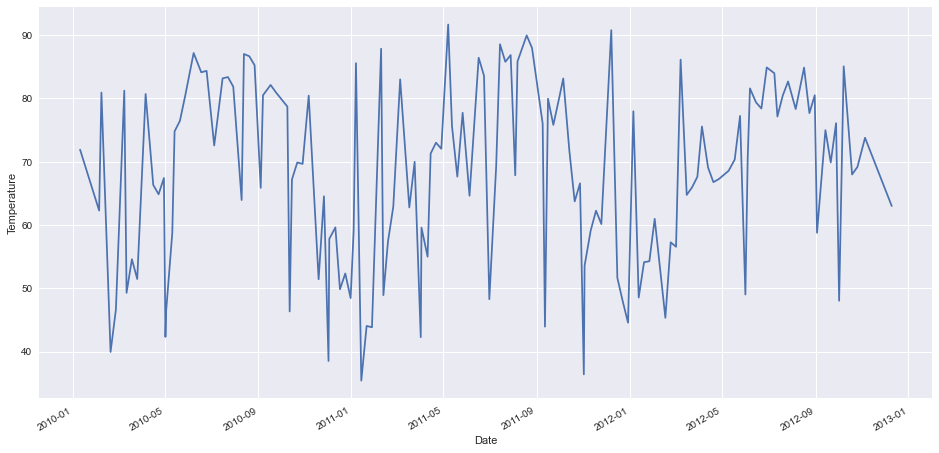

In [13]:
_ = df['Temperature'].plot.line(figsize=(16, 8), ylabel='Temperature')

### Areachart

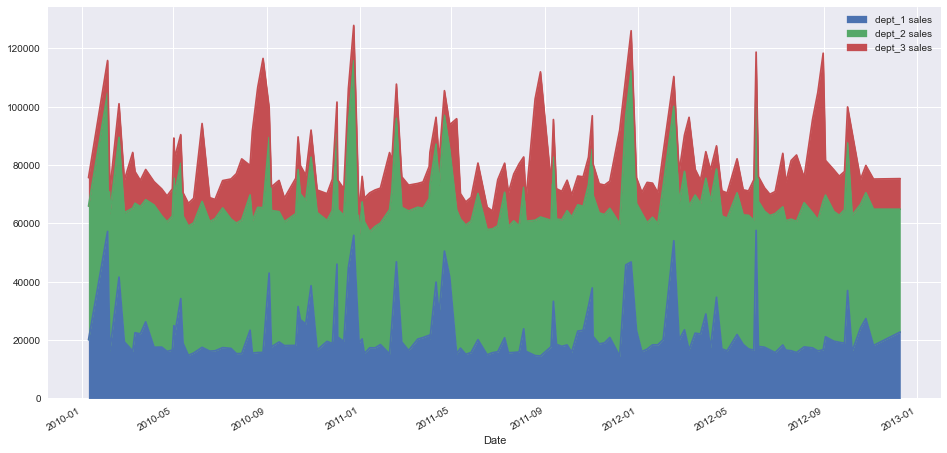

In [14]:
_ = df[['dept_1 sales', 'dept_2 sales', 'dept_3 sales']].plot.area(figsize=(16, 8))

### Scatter plot

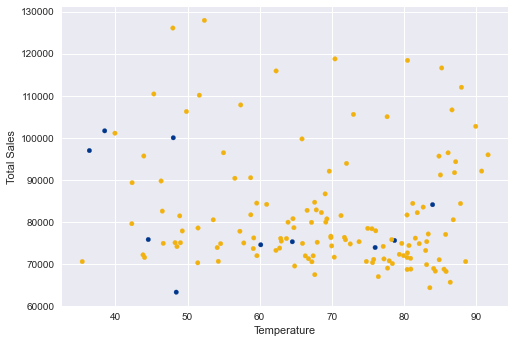

In [15]:
temp_df = df.loc[:, ['Temperature', 'Day type']] #performs a real copy instead of a lazy one.
temp_df['Total Sales'] = df['dept_1 sales'] + df['dept_2 sales'] + df['dept_3 sales']
color_map = {'Regular day': '#F1B20F', 'Holiday': '#00368c'}
_ = temp_df.plot.scatter(x='Temperature', y='Total Sales', c=temp_df['Day type'].map(color_map))

# The 'Day type' coloring didn't pan out, but I thought it still looked interesting.

In [16]:
# find an intersting scatterplot
df.corr().style.applymap(lambda x: 'color: ' + ('red; font-weight: bold;' if abs(x) > .7 else 'black'))

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,dept_1 sales,dept_2 sales,dept_3 sales
Temperature,1.000000,0.228493,0.128972,-0.467411,-0.087130,0.025732,-0.292917,0.118503,-0.180695,-0.473860,-0.014821,0.336490
Fuel_Price,0.228493,1.000000,0.092808,-0.301010,-0.179147,0.011074,-0.235280,0.755259,-0.513944,-0.066396,0.034471,0.027219
MarkDown1,0.128972,0.092808,1.000000,-0.015583,-0.171263,0.770225,0.104151,0.023637,-0.066306,-0.025236,0.407697,0.299005
MarkDown2,-0.467411,-0.301010,-0.015583,1.000000,-0.056176,-0.034380,0.039414,-0.310920,0.315449,0.098830,-0.175428,-0.136060
MarkDown3,-0.087130,-0.179147,-0.171263,-0.056176,1.000000,-0.093511,-0.179853,-0.295791,0.274212,-0.022232,-0.087791,-0.076008
MarkDown4,0.025732,0.011074,0.770225,-0.034380,-0.093511,1.000000,0.094616,-0.006998,-0.057036,0.014132,0.408017,0.281112
MarkDown5,-0.292917,-0.235280,0.104151,0.039414,-0.179853,0.094616,1.000000,-0.305143,0.305493,-0.017468,0.053172,-0.004677
CPI,0.118503,0.755259,0.023637,-0.310920,-0.295791,-0.006998,-0.305143,1.000000,-0.813471,-0.043533,0.121627,0.072986
Unemployment,-0.180695,-0.513944,-0.066306,0.315449,0.274212,-0.057036,0.305493,-0.813471,1.000000,0.103399,-0.045789,-0.089588
dept_1 sales,-0.473860,-0.066396,-0.025236,0.098830,-0.022232,0.014132,-0.017468,-0.043533,0.103399,1.000000,0.336518,-0.203070


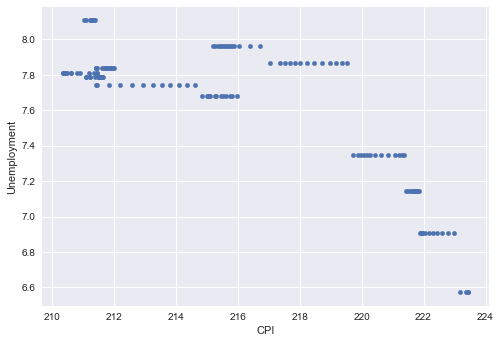

In [17]:
_ = df.plot.scatter(x='CPI', y='Unemployment')